# [Numerical Integration of Exponential Growth](http://www.rpgroup.caltech.edu/ncbs_pboc/code/t1a_numerical_integration.html)
Exponential growth through numerical integration -- a handy technique for numerically evaluating differential equations.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

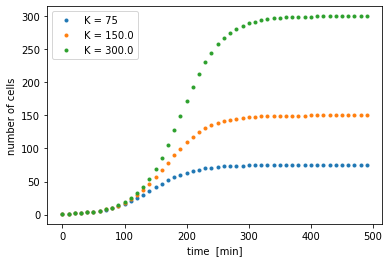

In [6]:
# Set the carrying capacity:
K = [75, 1.5E2, 3E2]

# Extend the total time of the integration
delta_t = 0.1
N_0 = 1
r = 0.03
total_time = 500
time_range = np.arange(0, total_time, delta_t)
n_time_steps = int(total_time / delta_t)
# Set the storage vector so we don't rewrite our correct approach
N_t = np.zeros((len(K), n_time_steps))
N_t[:,0] = N_0

# Loop through each carrying capacity
for k in range(len(K)): 
    
    # Loop through each time step.
    for t in range(1, n_time_steps): 
    
        # Calculate the change in the number of cells. 
        dN = N_t[k, t - 1] * r * delta_t * (1 - N_t[k, t - 1] / K[k])
    
        # Update the number of cells at the current time point
        N_t[k, t] = N_t[k, t - 1] + dN
         
# Loop through the carrying capacities and plot every 100th point.
for i in range(len(K)):
    plt.plot(time_range[::100], N_t[i, ::100], '.', label='K = ' + str(K[i]))
    
# Add appropriate labels and legends. 
plt.xlabel('time  [min]')
plt.ylabel('number of cells')
plt.legend() 

In [9]:
time_range.shape, N_t.shape

((5000,), (3, 5000))

In [11]:
list(time_range)

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2000000000000002,
 1.3,
 1.4000000000000001,
 1.5,
 1.6,
 1.7000000000000002,
 1.8,
 1.9000000000000001,
 2.0,
 2.1,
 2.2,
 2.3000000000000003,
 2.4000000000000004,
 2.5,
 2.6,
 2.7,
 2.8000000000000003,
 2.9000000000000004,
 3.0,
 3.1,
 3.2,
 3.3000000000000003,
 3.4000000000000004,
 3.5,
 3.6,
 3.7,
 3.8000000000000003,
 3.9000000000000004,
 4.0,
 4.1000000000000005,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6000000000000005,
 4.7,
 4.800000000000001,
 4.9,
 5.0,
 5.1000000000000005,
 5.2,
 5.300000000000001,
 5.4,
 5.5,
 5.6000000000000005,
 5.7,
 5.800000000000001,
 5.9,
 6.0,
 6.1000000000000005,
 6.2,
 6.300000000000001,
 6.4,
 6.5,
 6.6000000000000005,
 6.7,
 6.800000000000001,
 6.9,
 7.0,
 7.1000000000000005,
 7.2,
 7.300000000000001,
 7.4,
 7.5,
 7.6000000000000005,
 7.7,
 7.800000000000001,
 7.9,
 8.0,
 8.1,
 8.200000000000001,
 8.3,
 8.4,
 8.5,
 8.6,
 8.700000000000001,


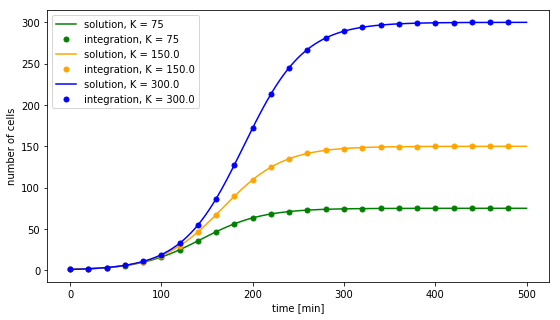

In [7]:
# Solve the analytical solution for our three carrying capacities.  
solution = np.zeros((len(K), n_time_steps))
for i in range(len(K)):
    solution[i, :] = N_0 * K[i] / (np.exp(-r * time_range) * (K[i] - N_0) + N_0)
    
# Define the colors so they match up. 
colors = ['green', 'orange', 'blue']

# Set up a figure that's a bit bigger
fig = plt.figure(figsize=(9, 5))

# Plot the analytical solutions and numerical integrations 
for i in range(len(K)):
    # Analytical solution
    plt.plot(time_range, solution[i,:], color=colors[i], 
             label='solution, K = ' + str(K[i]))
    
    # Numerical integration
    plt.plot(time_range[::200], N_t[i, ::200], '.', markersize=10, color=colors[i],
            label='integration, K = ' + str(K[i]))
   
# Add axis labels and a legend.
plt.xlabel('time [min]')
plt.ylabel('number of cells')
plt.legend()